The dataset that we’re going to use has been obtained from the machine learning repository of University of California Irvine. It is about live selling, which means demonstrating and selling items through a live stream, typically on social media. Each row shows one product. To understand the links between products and customers, we will use a variety of reactions, the number of comments, and the number of shares to a Facebook post. In total, there are 13 features. Let’s start with loading the dataset.

In [1]:
import pandas as pd
dataset = pd.read_csv('Live.csv')

In [2]:
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [3]:
from sklearn.cluster import KMeans

In [4]:
model = KMeans(n_clusters=3)

In [5]:
model.fit(dataset)

KMeans(n_clusters=3)

In [6]:
labels = model.predict(dataset)
labels

array([1, 0, 1, ..., 0, 0, 0])

In [7]:
import numpy as np

In [8]:
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([4288, 2334,  428], dtype=int64))

In [9]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [10]:
silhouettes = []
ks = list(range(2,12))

In [11]:
ks

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [12]:
for n_cluster in ks:
    kmeans = KMeans(n_clusters = n_cluster).fit(dataset)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print('For n clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

For n clusters=2, The Silhouette Coefficient is 0.8188237721696822
For n clusters=3, The Silhouette Coefficient is 0.8972493682244883
For n clusters=4, The Silhouette Coefficient is 0.9106664962327088
For n clusters=5, The Silhouette Coefficient is 0.8866768371183754
For n clusters=6, The Silhouette Coefficient is 0.8430118288915796
For n clusters=7, The Silhouette Coefficient is 0.8419421782294257
For n clusters=8, The Silhouette Coefficient is 0.8369757672176514
For n clusters=9, The Silhouette Coefficient is 0.7601867631720509
For n clusters=10, The Silhouette Coefficient is 0.7512074126653147
For n clusters=11, The Silhouette Coefficient is 0.7154432067557073


In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Silhouette score')

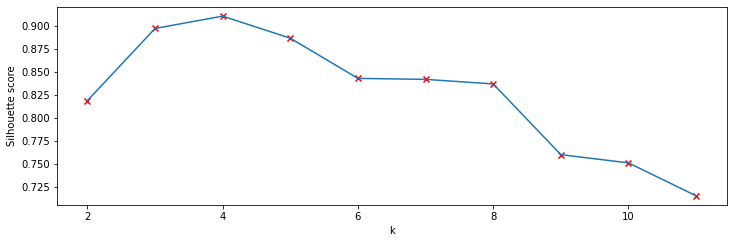

In [14]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score')

En yüksek Silhouette score k = 4

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4)
model.fit(dataset)
labels = model.predict(dataset)
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([2334, 4288,   63,  365], dtype=int64))

In [16]:
dataset['labels'] = labels
dataset['labels'].value_counts()

1    4288
0    2334
3     365
2      63
Name: labels, dtype: int64

num_comments

num_shares

In [25]:
status_type = dataset[['status_type_photo', 'status_type_video', 'status_type_status']].idxmax(axis=1)
dataset = pd.concat([dataset['labels'], status_type.rename('status_type')], axis=1)

In [26]:
dataset.groupby(['labels', 'status_type'])['status_type'].count()

labels  status_type       
0       status_type_video     2334
1       status_type_photo     4288
2       status_type_photo       63
3       status_type_status     365
Name: status_type, dtype: int64